### **Problem Statement:**

* My organisation has business of a retail supermarket having multiple stores across various countries. There are 1559 products across 10 stores in different cities.

* **Objective:** I want to build a prediction model for sales based on product and outlet.

* **Business Goal:** Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

* **Analysis:**
> * We can guide the company challenges in making good profit.
> * What are the brands or products which is sold the most
> * This helps sales team to understand which product to sell & which product to promote.

### **Importing required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

#### **Data Structure:**

In [2]:
bmtest = pd.read_csv("/content/Test.csv")
bmtrain = pd.read_csv("/content/Train.csv")

In [3]:
bmtest.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store


In [4]:
bmtrain.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


* We need to work on the training dataset because first we will train the data after model building we will test the test dataset.

In [5]:
bmtrain.shape , bmtest.shape

((8523, 12), (5681, 11))

In [6]:
bmtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
bmtrain.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
bmtrain.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [9]:
bmtest.isnull().sum()

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


* There are null values in the columns item weight and outlet size so, using appropriate methods need to fill these null values.

In [10]:
# Exploring different number of products are in the train data
bmtrain.Item_Type.value_counts() , bmtrain.Item_Type.value_counts().sum()

(Item_Type
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: count, dtype: int64,
 8523)

#### **Exploratory Data Analysis:**

* Handling missing values/null values
* Outlier detection
* Feature selection for analysis
* Data transformation - Encoding
* Visualization
* Standarizing



In [11]:
bmtrain.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Understanding the featrues/feature selection**

* There are 5 numerical features and 7 categorical features. Removing item indetifier and converting the year into string.


In [12]:
bmtrain.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
# bmtrain.drop('Item_Identifier', axis = 1, inplace = True)

In [14]:
bmtrain['Outlet_Establishment_Year'] = bmtrain['Outlet_Establishment_Year'].astype(int)
bmtrain['Outlet_Establishment_Year'].dtype

dtype('int64')

In [15]:
bmtrain.Outlet_Establishment_Year

,Outlet_Establishment_Year
0,1999
1,2009
2,1999
3,1998
4,1987
...,...
8518,1987
8519,2002
8520,2004
8521,2009


In [16]:
bmtrain.Outlet_Identifier.value_counts().count() , bmtrain.Outlet_Identifier.value_counts()

(10,
 Outlet_Identifier
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: count, dtype: int64)

* There are only 10 numbers allocated to all outlets so these are impotant in understanding where sales are effecting.

In [17]:
bmtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [18]:
bmtest.drop('Item_Identifier', axis = 1, inplace = True)

In [19]:
bmtest['Outlet_Establishment_Year'] = bmtest['Outlet_Establishment_Year'].astype(int)
bmtest['Outlet_Establishment_Year'].dtype

dtype('int64')

In [20]:
bmtest.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [21]:
bmtest.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


#### **Univariate Analysis**

* Considering one variable and how it is distributed



In [22]:
# There are numerical columns

num_cols = bmtrain.select_dtypes(include = ['float64', 'int64']).columns.tolist()
num_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [23]:
bmtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


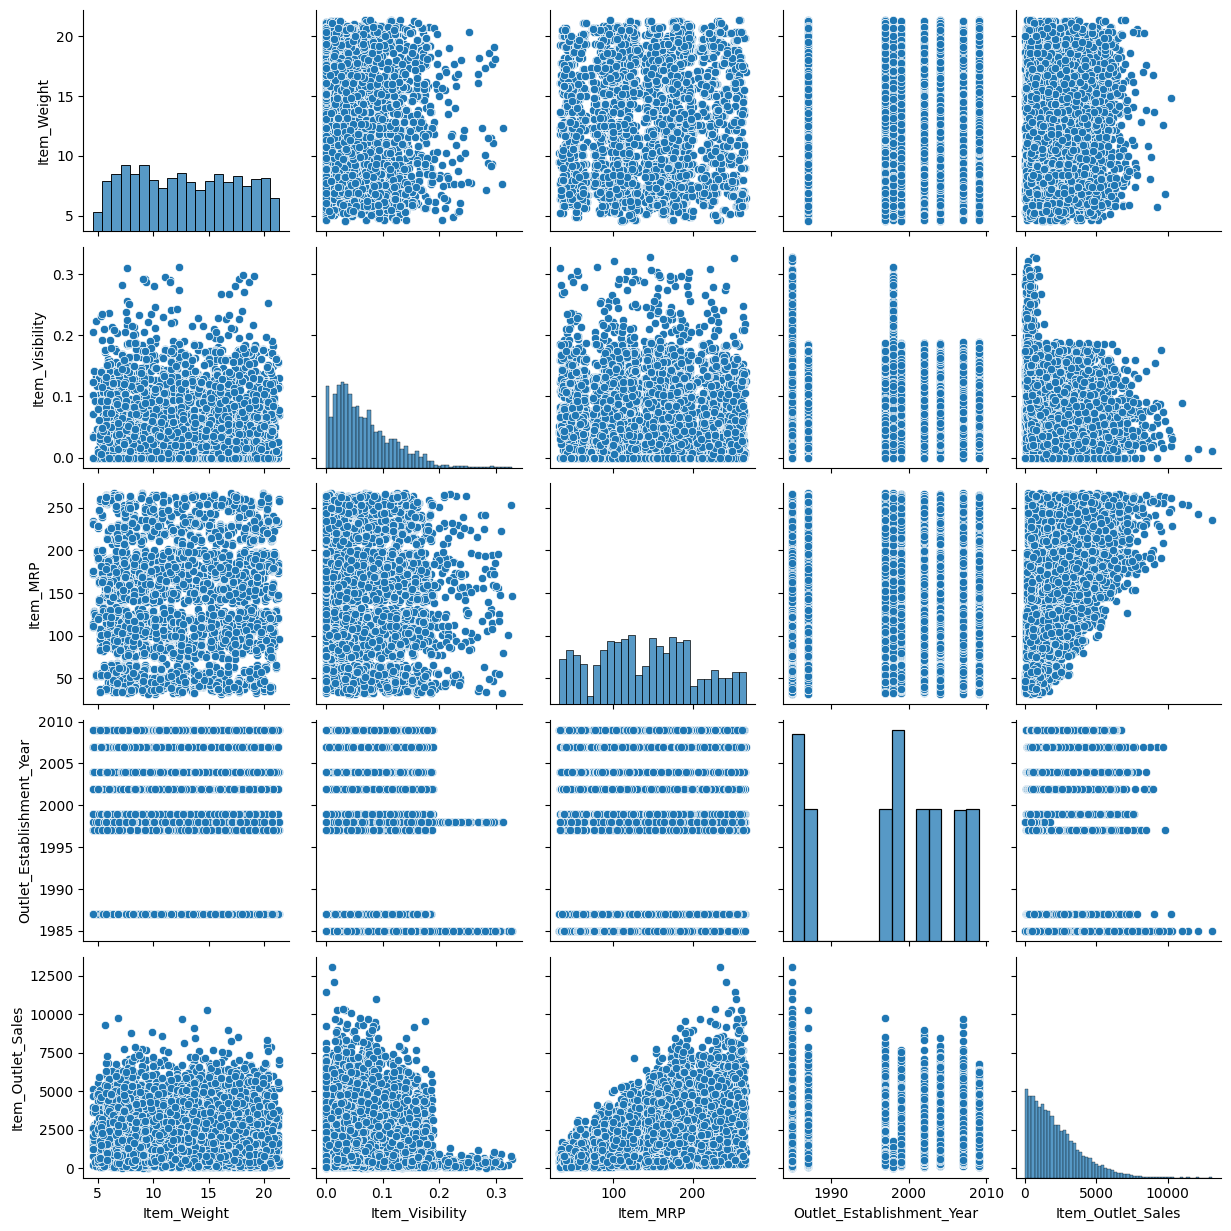

In [24]:
sns.pairplot(bmtrain[num_cols])

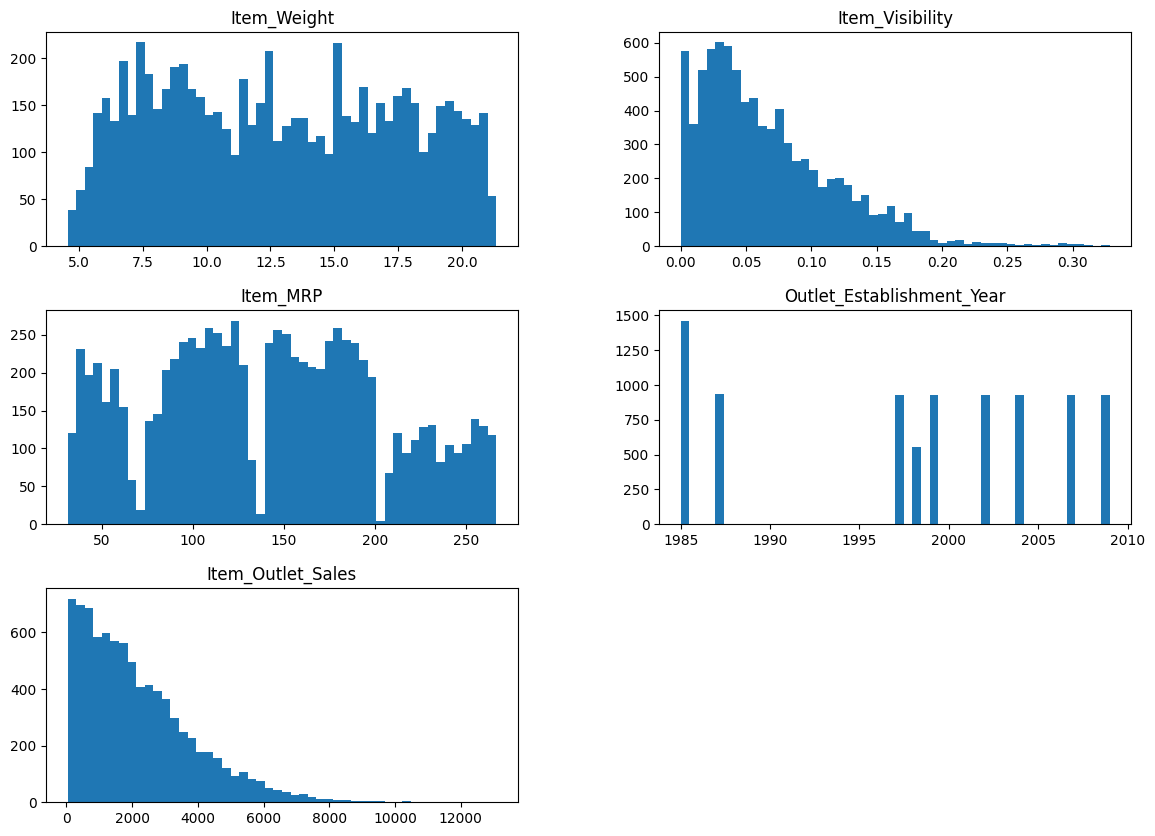

In [25]:
bmtrain[num_cols].hist(bins=50, figsize=(14, 10))
# plt.grid(False)

for ax in plt.gcf().axes:
    ax.grid(False)

plt.show()

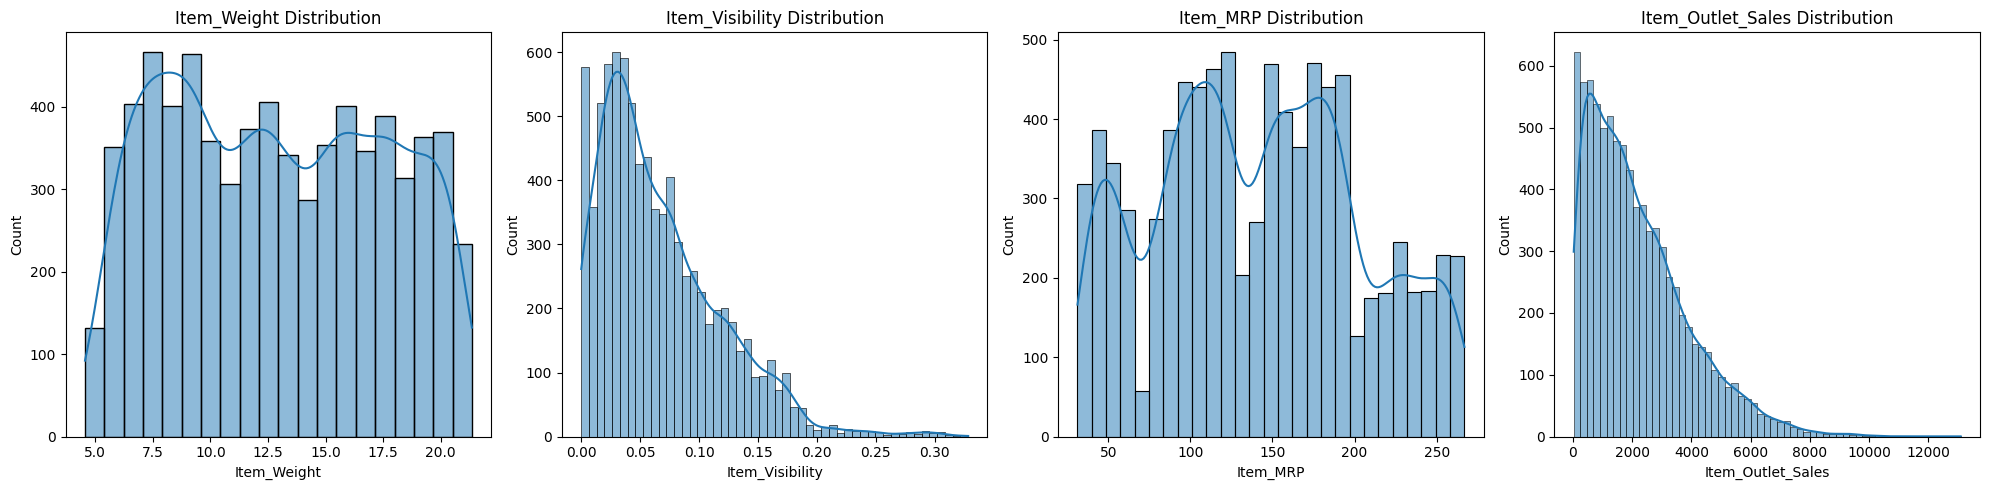

In [26]:
cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))


for i, col in enumerate(cols):
    sns.histplot(bmtrain[col], kde=True, ax=ax[i])  # Plot histogram with KDE on the respective axis
    ax[i].set_title(f'{col} Distribution')         # Set the title for each subplot
    #ax[i].grid(False)                              # Optionally remove the grid

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()

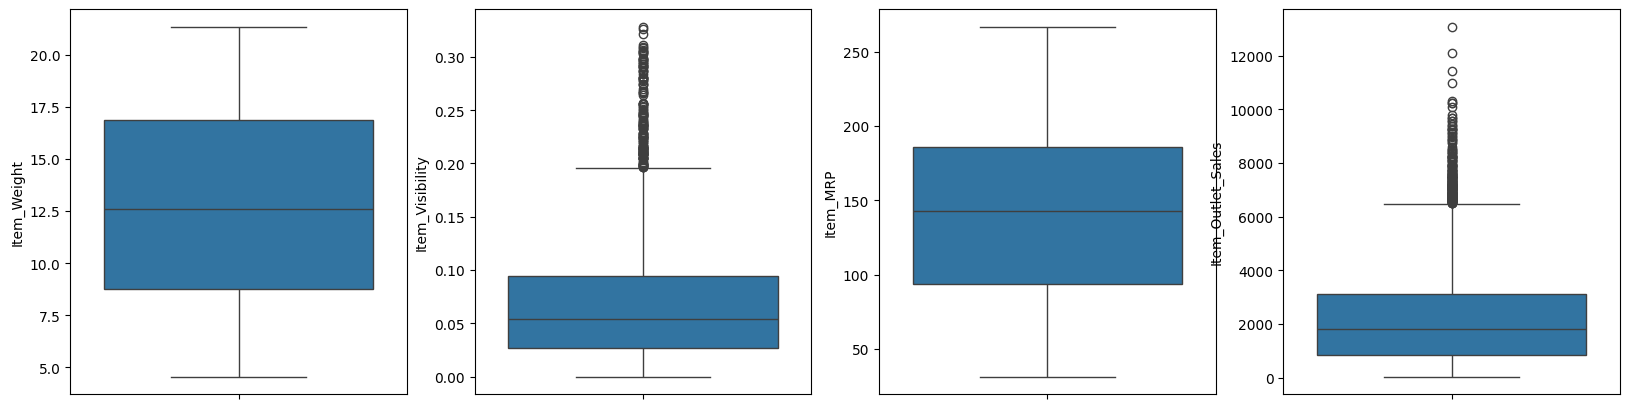

In [27]:
cols = ['Item_Weight','Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# Loop over columns and axes
for i, col in enumerate(cols):
    sns.boxplot(bmtrain[col], ax=ax[i])  # Plot histogram with KDE on the respective axis


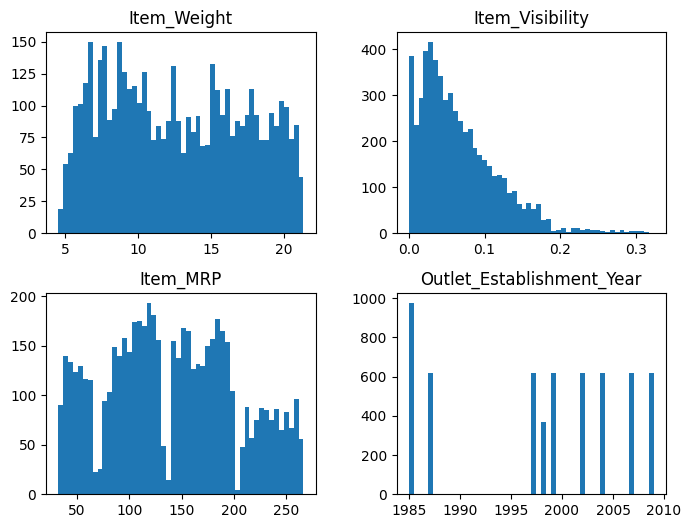

In [28]:
num_cols1 = bmtest.select_dtypes(include = ['float64', 'int64']).columns.tolist()
num_cols1

bmtest[num_cols1].hist(bins=50, figsize=(8, 6))
# plt.grid(False)

for ax in plt.gcf().axes:
    ax.grid(False)

plt.show()

* There are almost no outliers in the Item_Weight, Item_MRP and Outlet_Establishment_Year features.
* Conversely there are some outliers to be removed in the Item_Visibility and Item_Outlet_Sales features.
* The train and the test data have almost the same distributions

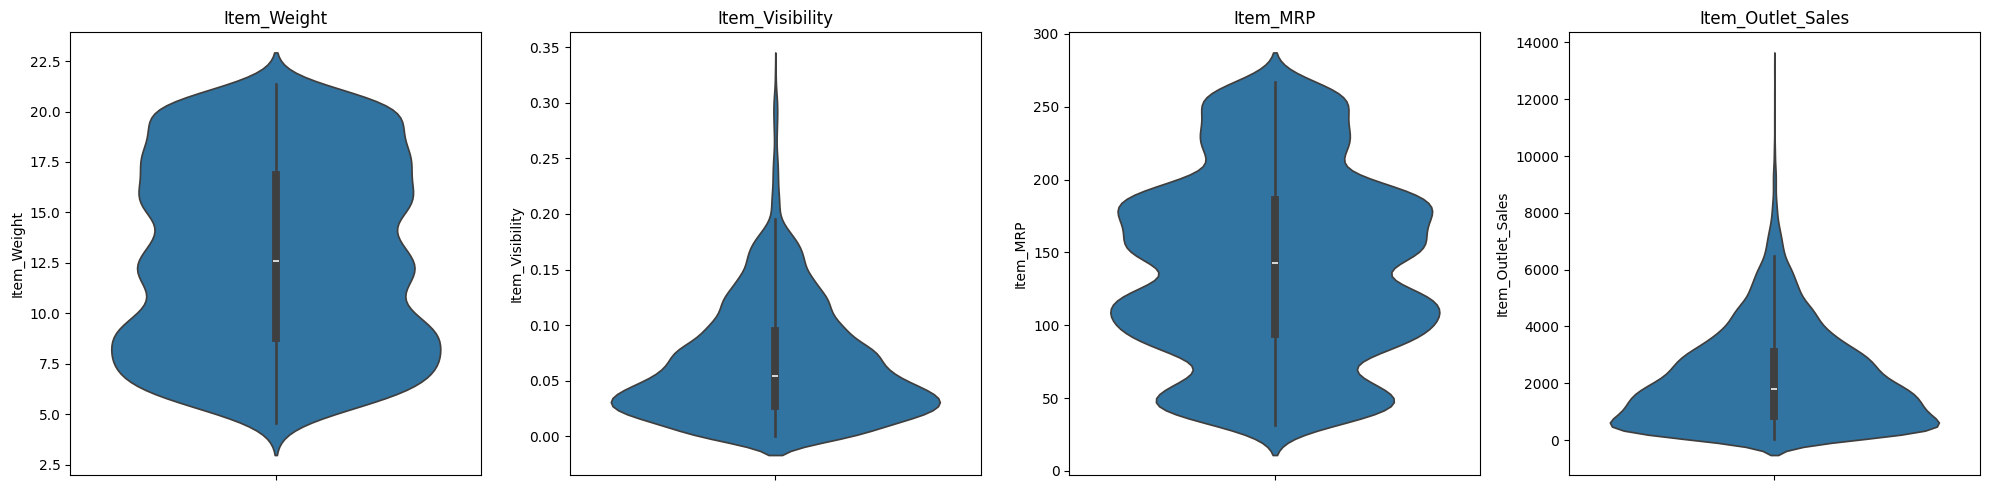

In [29]:
cols = ['Item_Weight','Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Create a figure with 4 subplots in one row
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plot violin plots using a for loop
for i, col in enumerate(cols):
    sns.violinplot(y=bmtrain[col], ax=axes[i])
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()
plt.show()

* We can see in above plots there are outliers clearly.

### Categorical Variables


In [30]:
categorical_cols = bmtrain.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [31]:
# Looking at data inside each categorical variable to group similar

for col in categorical_cols:
    print(f"Number of values in the {col} column is:\n{bmtrain[col].value_counts() }")
    print("--" * 30)

Number of values in the Item_Identifier column is:
Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64
------------------------------------------------------------
Number of values in the Item_Fat_Content column is:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
------------------------------------------------------------
Number of values in the Item_Type column is:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods      

In [32]:
bmtrain['Outlet_Location_Type'].unique().tolist()

['Tier 1', 'Tier 3', 'Tier 2']

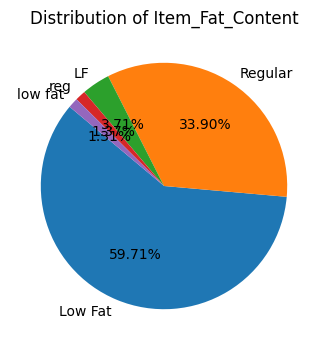

In [33]:

data = bmtrain['Item_Fat_Content'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(data, labels=data.index, autopct='%.2f%%', startangle=140)

plt.title('Distribution of Item_Fat_Content')
plt.show()

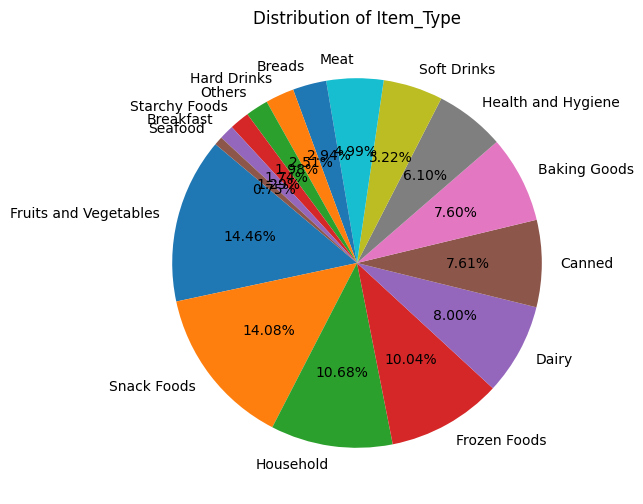

In [34]:
data = bmtrain['Item_Type'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(data, labels=data.index, autopct='%.2f%%', startangle=140)

plt.title('Distribution of Item_Type')
plt.show()

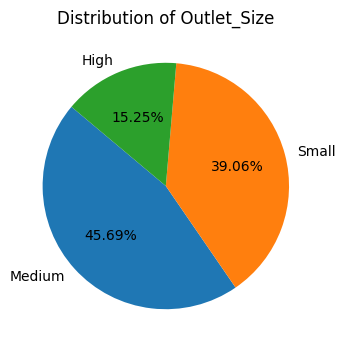

In [35]:

data = bmtrain['Outlet_Size'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(data, labels=data.index, autopct='%.2f%%', startangle=140)

plt.title('Distribution of Outlet_Size')
plt.show()

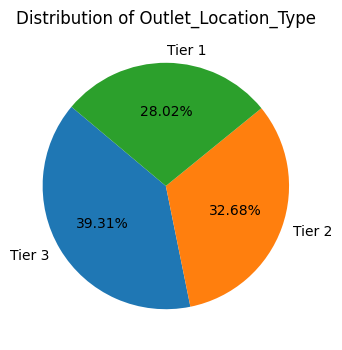

In [36]:
data = bmtrain['Outlet_Location_Type'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(data, labels=data.index, autopct='%.2f%%', startangle=140)

plt.title('Distribution of Outlet_Location_Type')
plt.show()

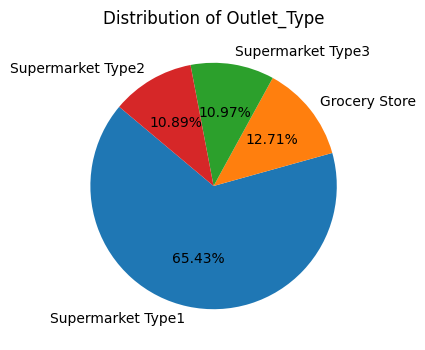

In [37]:
data = bmtrain['Outlet_Type'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(data, labels=data.index, autopct='%.2f%%', startangle=140)

plt.title('Distribution of Outlet_Type')
plt.show()

* There are 16 different categories in the the Item_type feature. I think it will help. In feature engineering section we can try to group them into categories.

For example grouping:

> * 'Soft Drinks' and 'Hard Drinks' into a 'Drinks' category or
'Snack Foods', 'Frozen Foods', 'Snarchy Foods' and 'Seafood' into a 'Foods' category

### **Bivariate Analysis**
> * Numerical variable to Numerical variable

In [38]:
## Our Y variable is Outlet sales -- Target variable
target = "Item_Outlet_Sales"

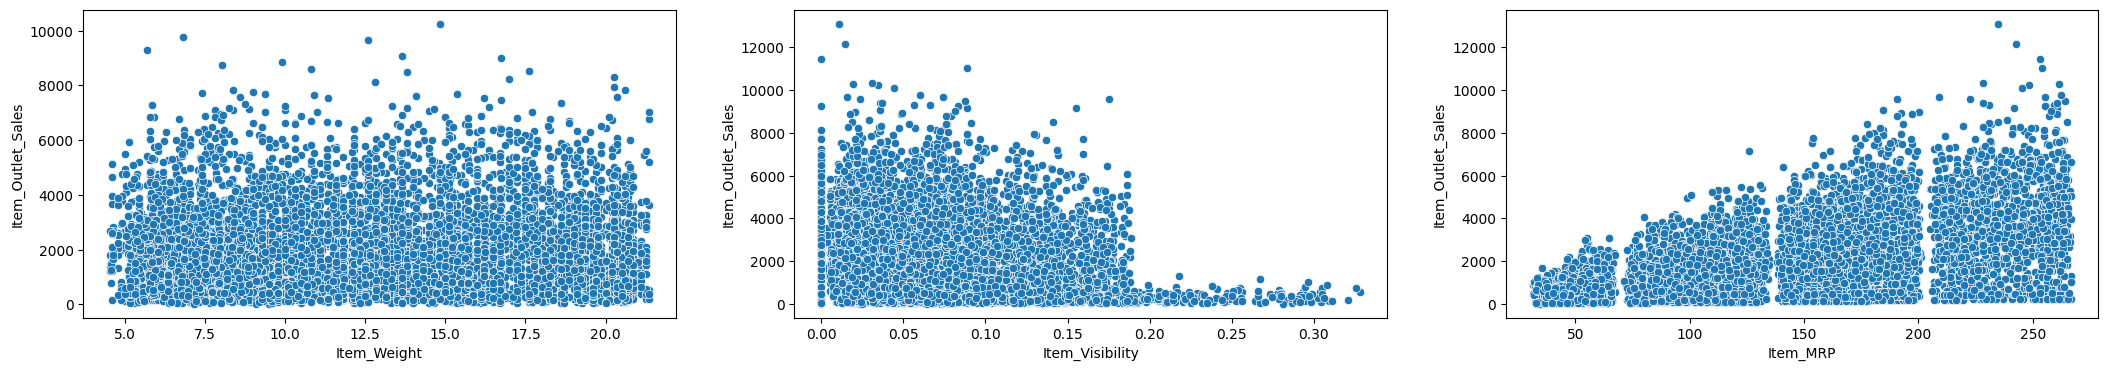

In [39]:
target = 'Item_Outlet_Sales'

ax = plt.subplots(nrows=1, ncols=3, figsize=(26, 4))

for index, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP']):
    sns.scatterplot(data=bmtrain, x=col, y=target, ax=ax[1][index])

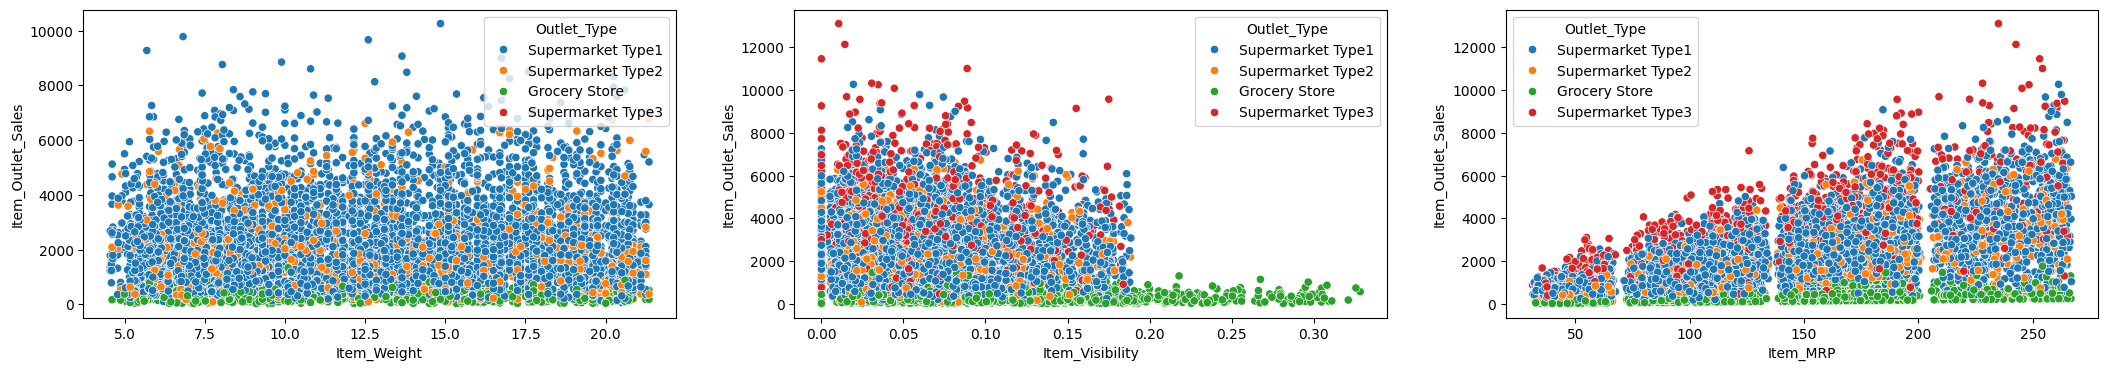

In [40]:
ax = plt.subplots(nrows=1, ncols=3, figsize=(26, 4))

for  index, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP']):
    sns.scatterplot(data=bmtrain, x=col, y=target, ax=ax[1][index], hue='Outlet_Type')

<Axes: >

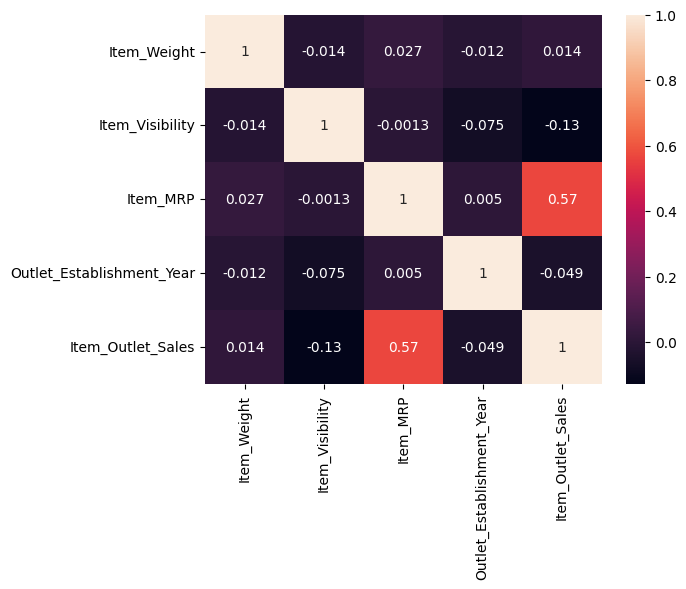

In [41]:
sns.heatmap(bmtrain[num_cols].corr(), annot=True)

* Numerical to categorical

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

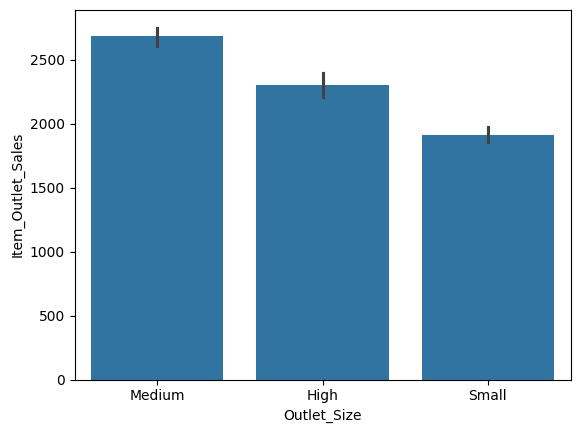

In [42]:
sns.barplot(data=bmtrain, x='Outlet_Size', y=target)

### **Missing Value treatment**

> **Handling missing values after observations from univariate and bivariate analysis which method to use**

* Item_weight is a numeric column and after visualizations, we can see clearly that there are no outliers in this feature. So we can replace missing values with its mean

* OutLet_Size is a catogerial column, we can use the mode to fill the missing values.

In [43]:
#bmtrain['Item_Weight'].fillna(bmtrain['Item_Weight'].mean(),inplace=True)


In [44]:
#filling the object values with mode and float type with mean

# for train data
bmtrain['Outlet_Size'] = bmtrain.Outlet_Size.fillna(bmtrain.Outlet_Size.dropna().mode()[0]) #replace by the median after
bmtrain['Item_Weight'] = bmtrain.Item_Weight.fillna(bmtrain.Item_Weight.mean())

# for test data
bmtest['Outlet_Size'] = bmtest.Outlet_Size.fillna(bmtest.Outlet_Size.dropna().mode()[0]) #replace by the median after
bmtest['Item_Weight'] = bmtest.Item_Weight.fillna(bmtest.Item_Weight.mean())

In [45]:
bmtrain['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,5203
Small,2388
High,932


* If the outlet type is Grocery Store in most of the cases the outlet size(mode) is Small
* If the outlet type is Supermarket Type1 in most of the cases the outlet size(mode) is Small
* If the outlet type is Supermarket Type2 in most of the cases the outlet size(mode) is Medium
* If the outlet type is Supermarket Type3 in most of the cases the outlet size(mode) is Medium

In [46]:
bmtrain.isnull().sum()
#bmtest.isnull().sum()


,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


### **Feature Engineering**

Upper limit:  0.195979015
Lower limit:  -0.07440424500000001


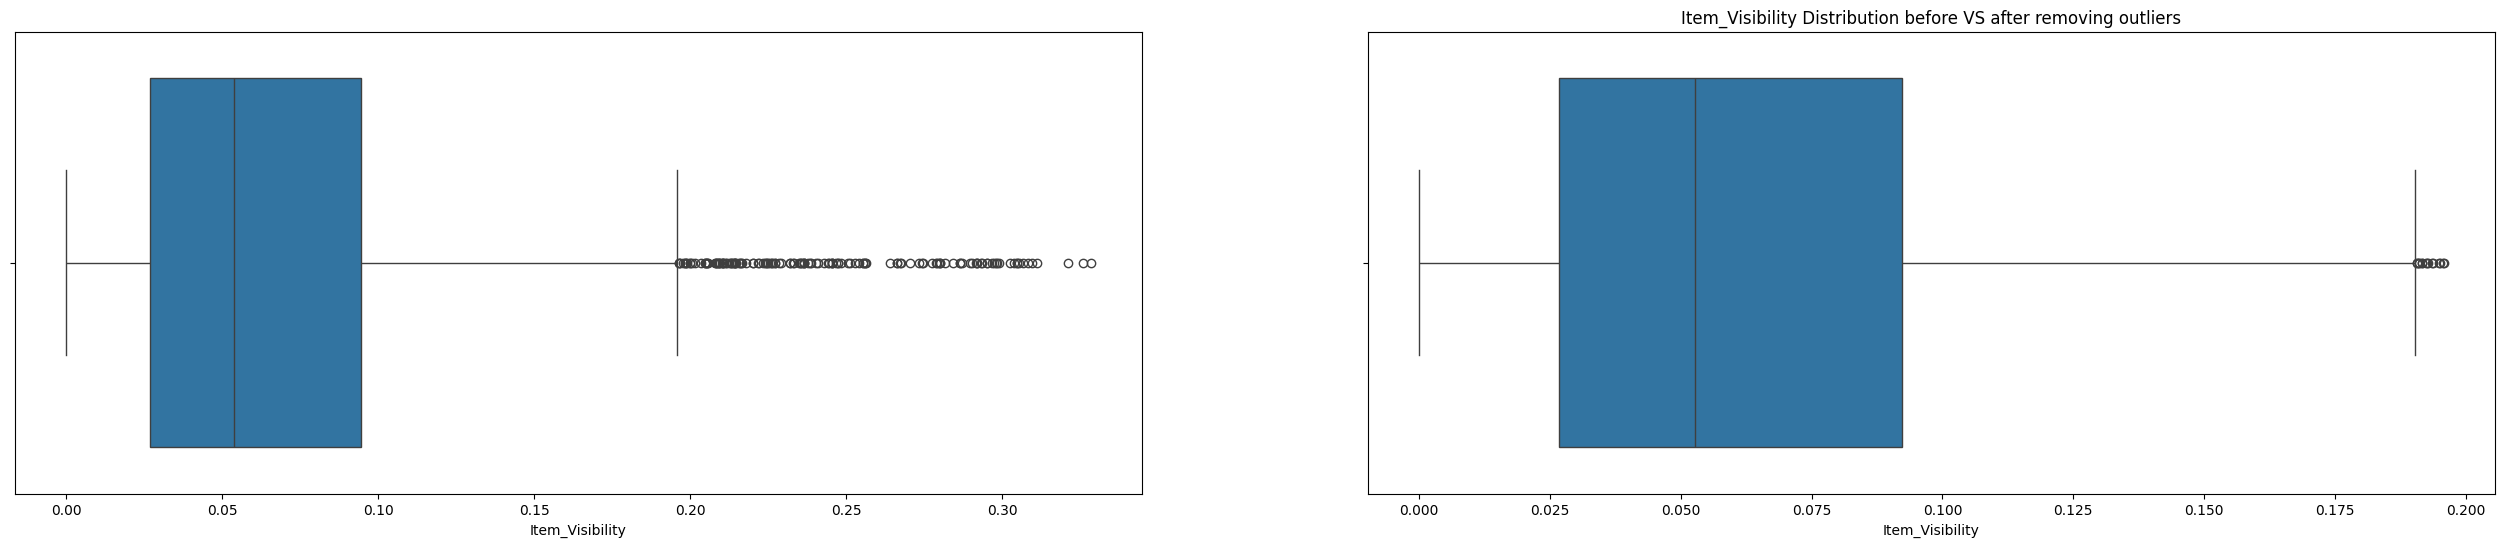

In [47]:
# Function to detect outliers
def detect_outliers(df, feature):
    Q1  = df[feature].quantile(0.25)
    Q3  = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = detect_outliers(bmtrain, "Item_Visibility")
print("Upper limit: ", upper)
print("Lower limit: ", lower)

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(32, 6))
sns.boxplot(x=bmtrain['Item_Visibility'], ax=ax[0])

# removing outliers using the above function
train = bmtrain[(bmtrain['Item_Visibility'] > lower) & (bmtrain['Item_Visibility'] < upper)] #train
test = bmtest[(bmtest['Item_Visibility'] > lower) & (bmtest['Item_Visibility'] < upper)]     #test

sns.boxplot(x=train['Item_Visibility'], ax=ax[1])
plt.title('Item_Visibility Distribution before VS after removing outliers')
plt.show()

Upper limit:  6499.2067
Lower limit:  -2499.7460999999994


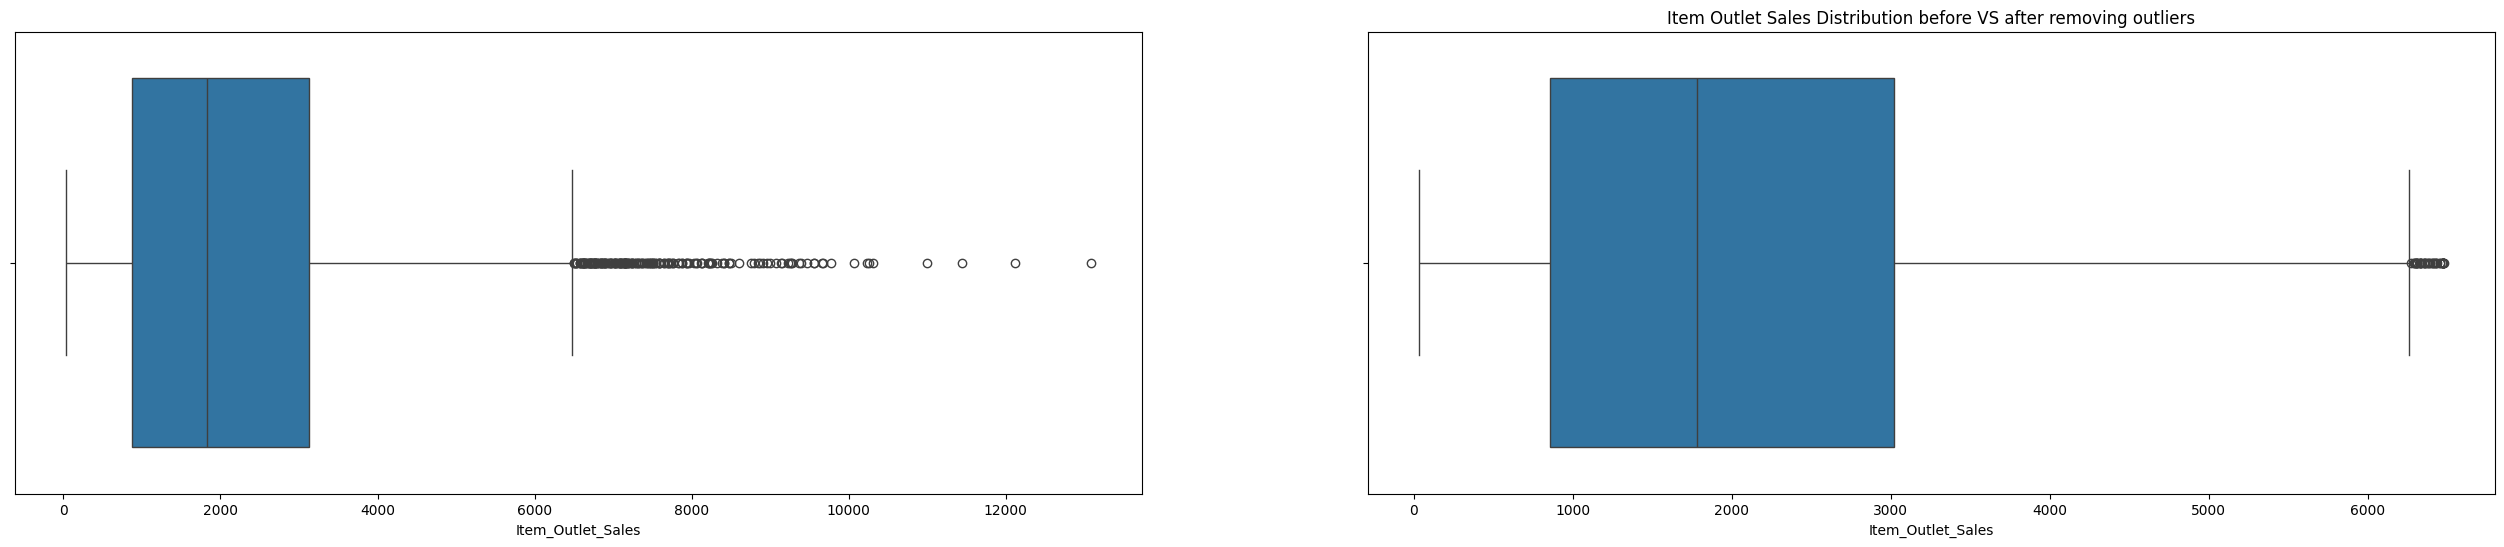

In [48]:
# detect outliers in the Item_Outlet_Sales feature
upper, lower = detect_outliers(train, "Item_Outlet_Sales")
print("Upper limit: ", upper)
print("Lower limit: ", lower)

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(32, 6))
sns.boxplot(x=train['Item_Outlet_Sales'], ax=ax[0])

# removing outliers using the same function
train = train[(train['Item_Outlet_Sales'] > lower) & (train['Item_Outlet_Sales'] < upper)]

sns.boxplot(x=train['Item_Outlet_Sales'], ax=ax[1])
plt.title('Item Outlet Sales Distribution before VS after removing outliers')
plt.show()

* The Item_Fat_Content column must be cleaned because there are some entry errors:

* 'Low Fat', 'low fat' and 'LF' should be the same category
Similarly 'Regular' and 'reg' should the same Another remarq in this column is that 'Low Fat' item category is greater than 'Regular' one.


In [49]:
#handle Item_Fat_Content column categories with replacement
bmtrain['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace=True)
bmtest['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace=True)

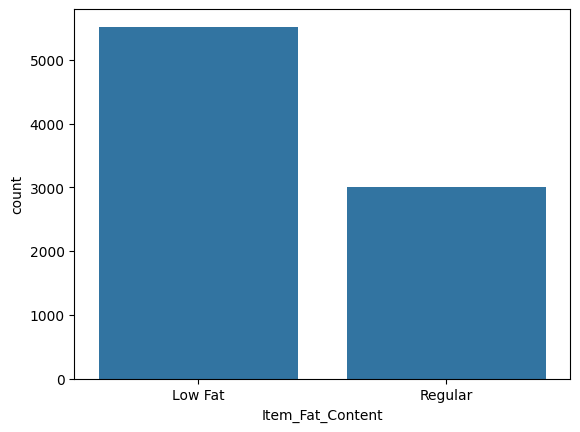

In [50]:
sns.countplot(x=bmtrain['Item_Fat_Content']);

### **Encoding**

In [51]:
bmtrain['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [52]:
bmtest['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

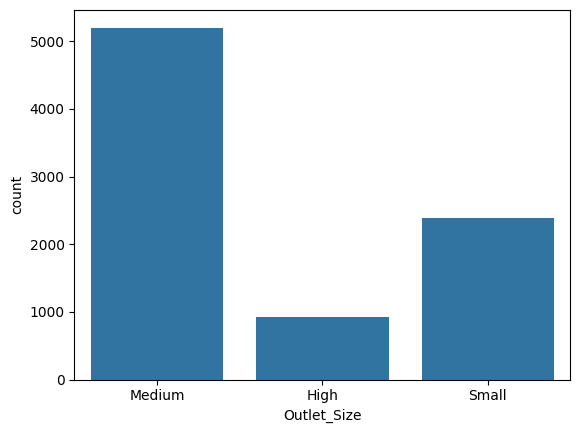

In [53]:
sns.countplot(x=bmtrain['Outlet_Size']);

In [54]:
bmtrain['Outlet_Size'] = bmtrain['Outlet_Size'].map({'Small'  : 1,
                                                 'Medium' : 2,
                                                 'High'   : 3
                                                 }).astype(int)

bmtest['Outlet_Size'] = bmtest['Outlet_Size'].map({'Small'  : 1,
                                               'Medium' : 2,
                                               'High'   : 3
                                              }).astype(int)



<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

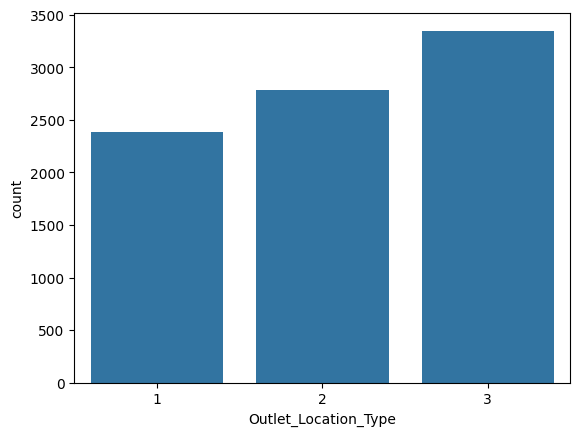

In [61]:
bmtrain['Outlet_Location_Type'] = bmtrain['Outlet_Location_Type'].str[-1:].astype(int)
bmtest['Outlet_Location_Type']  = bmtest['Outlet_Location_Type'].str[-1:].astype(int)
sns.countplot(x = bmtrain['Outlet_Location_Type'])

* In the Item_Type feature, there are 16 catgories but when we look closely to Item_Identifier_Categories, it has first two characters defining the item type, these are:

> FD for probably Food;
> DR for probably Drinks;
> NC for probably Non-Consumables.

So we'll drop the Item_Identifier feature and create a new column containing these categories.

<Axes: xlabel='Item_Identifier_Categories', ylabel='count'>

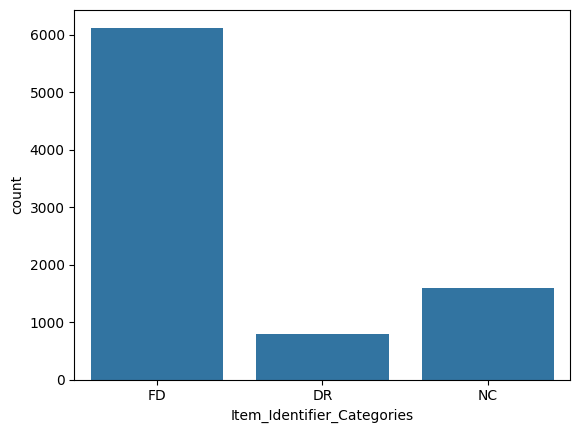

In [65]:
bmtrain['Item_Identifier_Categories'] = bmtrain['Item_Identifier'].str[0:2] #.astype(int)

sns.countplot(x=bmtrain['Item_Identifier_Categories'])

In [66]:
bmtrain.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_Categories
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2,1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2,3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2,1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,3,Grocery Store,732.3800,FD


In [57]:
#bmtrain.drop(labels=['Item_Identifier'], axis=1, inplace=True)

In [58]:
#X = train.drop('Item_Outlet_Sales', axis=1)
#y = train['Item_Outlet_Sales']

In [59]:
#X.head()

In [73]:
le = LabelEncoder()
ordinal_features = ['Item_Fat_Content', 'Outlet_Type', 'Outlet_Location_Type']

for feature in ordinal_features:
    bmtrain[feature] = le.fit_transform(bmtrain[feature])
    bmtest[feature]  = le.fit_transform(bmtest[feature])




In [75]:
bmtest.shape, bmtrain.shape

((5681, 10), (8523, 13))

In [76]:
bmtrain.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_Categories
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,2,0,1,3735.1380,FD
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,2,2,2,443.4228,DR
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,2,0,1,2097.2700,FD


### **One hot coding**


In [79]:
#bmtrain = pd.get_dummies(bmtrain, columns=['Item_Type', 'Item_Identifier_Categories', 'Outlet_Identifier'], drop_first=True)
#bmtest  = pd.get_dummies(bmtest,  columns=['Item_Type', 'Outlet_Identifier'], drop_first=True)

In [80]:
bmtrain.drop(labels=['Item_Identifier'], axis=1, inplace=True)
bmtest.drop(labels=['Item_Identifier'],  axis=1, inplace=True)

KeyError: "['Item_Identifier'] not found in axis"

In [81]:
bmtrain.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Item_Identifier_Categories_FD',
       'Item_Identifier_Categories_NC', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049'],
      dtype='object')

In [82]:
X = bmtrain.drop('Item_Outlet_Sales', axis=1)
y = bmtrain['Item_Outlet_Sales']

In [83]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Breads,Item_Type_Breakfast,...,Item_Identifier_Categories_NC,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30,0,0.016047,249.8092,1999,2,0,1,False,False,...,False,False,False,False,False,False,False,False,False,True
1,5.92,1,0.019278,48.2692,2009,2,2,2,False,False,...,False,False,False,True,False,False,False,False,False,False
2,17.50,0,0.016760,141.6180,1999,2,0,1,False,False,...,False,False,False,False,False,False,False,False,False,True
3,19.20,1,0.000000,182.0950,1998,2,2,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,8.93,0,0.000000,53.8614,1987,3,2,1,False,False,...,True,True,False,False,False,False,False,False,False,False


In [84]:
y.head()

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [86]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [87]:
# Predictions for LinearRegression on the test data
lin_reg_predictions = lin_reg_model.predict(X_test)

In [88]:
print('Training score  : {}'.format(lin_reg_model.score(X_train, y_train)))
print('Test score      : {}'.format(lin_reg_model.score(X_test, y_test)))

Training score  : 0.563775153746993
Test score      : 0.5613700439518001


In [90]:
import math

In [91]:
lin_reg_mse  = mean_squared_error(y_test , lin_reg_predictions)
lin_reg_rmse = math.sqrt(lin_reg_mse)
lin_reg_r2   = r2_score(y_test, lin_reg_predictions)

print('RMSE  \t         ----> {}'.format(lin_reg_rmse))
print('R2 Score         ----> {}'.format(lin_reg_r2))

RMSE  	         ----> 1120.124401878512
R2 Score         ----> 0.5613700439518001


In [92]:
rand_forest_model = RandomForestRegressor()
rand_forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [93]:
# Predictions for XGBoost on the test data
rand_forest_predictions = rand_forest_model.predict(X_test)

In [94]:
print('Training score  : {}'.format(rand_forest_model.score(X_train, y_train)))
print('Test score      : {}'.format(rand_forest_model.score(X_test, y_test)))

Training score  : 0.9374438604800975
Test score      : 0.5720006863079647


In [95]:
rand_forest_mse = mean_squared_error(y_test , rand_forest_predictions)
rand_forest_rmse = math.sqrt(rand_forest_mse)
rand_forest_r2 = r2_score(y_test, rand_forest_predictions)

print('RandomForest RMSE  \t       ----> {}'.format(rand_forest_rmse))
print('RandomForest R2 Score       ----> {}'.format(rand_forest_r2))

RandomForest RMSE  	       ----> 1106.467470835202
RandomForest R2 Score       ----> 0.5720006863079647


The gap between the training score and the test score is huge so RandomForest is overfitting the data. We can handle this issue with hyperparameter tuning.

In [96]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [97]:
xgb_predictions = xgb_model.predict(X_test)

In [98]:
print('XGBoost Training score  : {}'.format(xgb_model.score(X_train, y_train)))
print('XGBoost Test score      : {}'.format(xgb_model.score(X_test, y_test)))

XGBoost Training score  : 0.8652643182027763
XGBoost Test score      : 0.5291644917433762


XGBoost is also overfitting the data. We'll try after to tune the hyperparameters for XGBoost and see how the model performs.

** The training score is good but when testing it is low not good model**


In [99]:
xgb_mse = mean_squared_error(y_test , xgb_predictions)
xgb_rmse = math.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_predictions)

print('XGBoost RMSE  \t   ----> {}'.format(xgb_rmse))
print('XGBoost R2 Score   ----> {}'.format(xgb_r2))

XGBoost RMSE  	   ----> 1160.5175653318408
XGBoost R2 Score   ----> 0.5291644917433762


**There is overfitting in the data, we need try to create additional features and reduce the overfitting and can get best results.**